<a href="https://colab.research.google.com/github/KU-Gen-AI-2567/Autoencoder-demo/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder - 01418496 (หมู่เรียน 200)

สมาชิกกลุ่ม

นายศิวกร ภาสว่าง 6410451423

นางสาว เเพรวรุ้ง พุดชะวา 6410451253

นางสาว มารีน่า มิทซุย 6410450222

หมู่ 200

ชุดข้อมูล : Cat and Dog

ลิ้งค์ดาวน์โหลด: https://www.kaggle.com/datasets/tongpython/cat-and-dog

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import kagglehub
import shutil
import os
tf.__version__

'2.17.1'

In [ ]:
import numpy as np
from PIL import Image

### Setting to execute on Processor (GPU or CPU)

In [ ]:
gpus = tf.config.list_physical_devices("GPU")
if len(gpus) > 0:
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print("Execute on GPU")
else:
    print("Execute on CPU")

Execute on GPU


### Download Dataset

In [ ]:
# Download the dataset folder in latest version
if not "dataset" in os.listdir("."):
    path = kagglehub.dataset_download("tongpython/cat-and-dog/version/1")
    print("Path to dataset files:", path)
    shutil.move(path, "./dataset")
    print("Download Dataset Complete")
else:
    print("Download Dataset Already")

Download Dataset Already


## Prepossessing


In [ ]:
dataset_path = "./dataset"
for dirpath, dirnames, filenames in os.walk(dataset_path):
    print(f"Path: {dirpath}, Subdirectories: {dirnames}, Files: {len(filenames)}")

Path: ./dataset, Subdirectories: ['training_set', 'test_set'], Files: 0
Path: ./dataset/training_set, Subdirectories: ['training_set'], Files: 0
Path: ./dataset/training_set/training_set, Subdirectories: ['dogs', 'cats'], Files: 0
Path: ./dataset/training_set/training_set/dogs, Subdirectories: [], Files: 4006
Path: ./dataset/training_set/training_set/cats, Subdirectories: [], Files: 4001
Path: ./dataset/test_set, Subdirectories: ['test_set'], Files: 0
Path: ./dataset/test_set/test_set, Subdirectories: ['dogs', 'cats'], Files: 0
Path: ./dataset/test_set/test_set/dogs, Subdirectories: [], Files: 1013
Path: ./dataset/test_set/test_set/cats, Subdirectories: [], Files: 1012


In [ ]:
def preprocess(imgs):
    imgs = imgs.astype("float32") / 255.0  # Normalize pixel values to [0, 1]
    imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2), (0, 0)), constant_values=0.0)
    return imgs

def to_image(img):
    img = np.squeeze(img)
    return Image.fromarray(np.uint8(img * 255))

In [ ]:
import cv2
def dataset_to_numpy_and_preprocess(dataset):
    images, labels = [], []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    imgs = np.concatenate(images)
    lbls = np.concatenate(labels)
    return preprocess(imgs), lbls

def change_gray_images(images):
    gray_images = []
    for image in images:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_images.append(image)

    gray_images = np.array(gray_images)
    gray_images = gray_images[..., np.newaxis]
    # gray_images = np.repeat(gray_images[:, :, :, np.newaxis], 3, axis=3)  # Repeat across the 3rd axis
    return gray_images

In [ ]:
train_dir = "./dataset/training_set/training_set"
test_dir = "./dataset/test_set/test_set"

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(50, 50),  # Resize images
    batch_size=32,
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(50, 50),
    batch_size=32,
)

X_train, y_train = dataset_to_numpy_and_preprocess(train_dataset)
X_test, y_test = dataset_to_numpy_and_preprocess(test_dataset)
X_train_gray = change_gray_images(X_train)
X_test_gray = change_gray_images(X_test)
del train_dataset
del test_dataset

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8005, 54, 54, 3)
y_train shape: (8005,)
X_test shape: (2023, 54, 54, 3)
y_test shape: (2023,)


In [ ]:
print(f"X_train_gray: {X_train_gray.shape}")
print(f"X_test_gray: {X_test_gray.shape}")
SHAPE = X_train_gray.shape[1:]
print(f"New Shape: {SHAPE}")

X_train_gray: (8005, 54, 54, 1)
X_test_gray: (2023, 54, 54, 1)
New Shape: (54, 54, 1)


In [ ]:
noise_factor = 0.1
X_train_noisy = X_train_gray + noise_factor * tf.random.normal(shape=X_train_gray.shape)
X_test_noisy = X_test_gray + noise_factor * tf.random.normal(shape=X_test_gray.shape)

X_train_noisy = tf.clip_by_value(X_train_noisy, clip_value_min=0., clip_value_max=1.)
X_test_noisy = tf.clip_by_value(X_test_noisy, clip_value_min=0., clip_value_max=1.)

In [ ]:
print(f"X train Noisy: {X_train_noisy.shape}")
print(f"X test Noisy: {X_test_noisy.shape}")

X train Noisy: (8005, 54, 54, 1)
X test Noisy: (2023, 54, 54, 1)


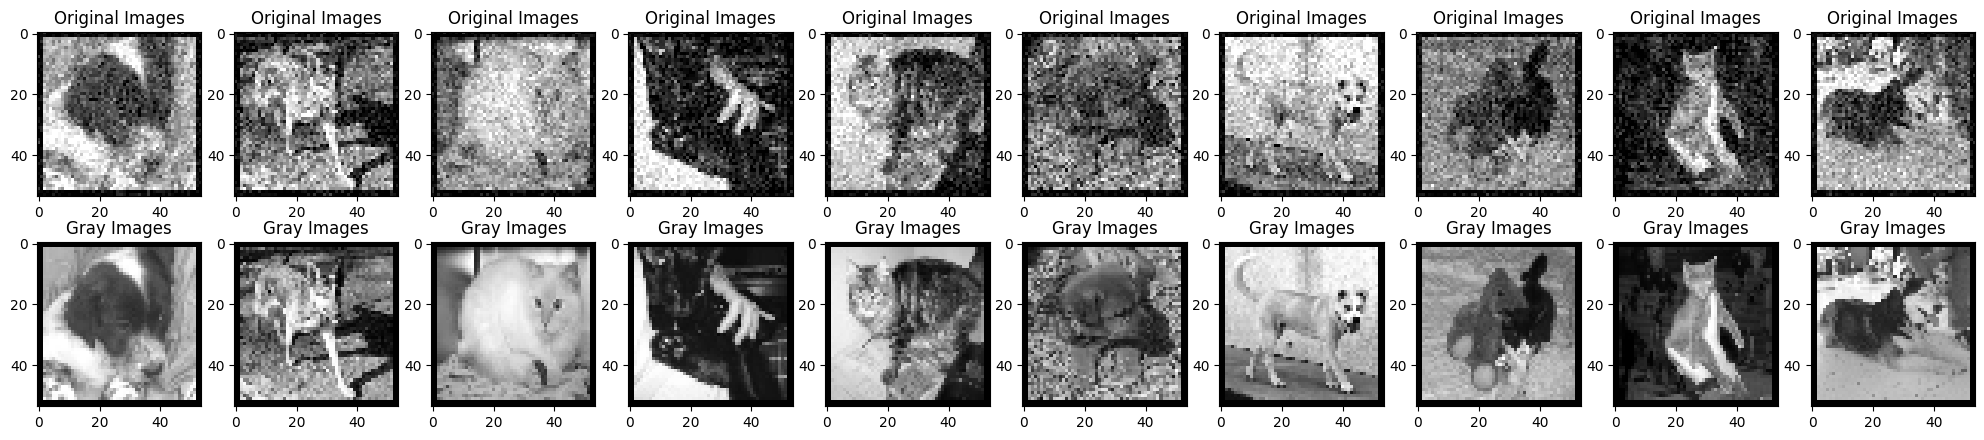

In [ ]:
num_images = 10
fig = plt.figure(figsize=(25, 5))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train_noisy[i], cmap='gray')
    plt.title("Original Images")

    plt.subplot(2, 10, i+1+num_images)
    plt.imshow(X_train_gray[i], cmap='gray')
    plt.title("Gray Images")

### Create Model by using function API

In [ ]:
from tensorflow.keras import models, layers, losses, activations, optimizers
import tensorflow.keras.backend as K

LATENT_DIM = 2048

# Encoder Model
encoder_input = layers.Input(shape=SHAPE, name="Encoder_Input")

x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation=activations.leaky_relu, strides=2)(encoder_input)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation=activations.leaky_relu)(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation=activations.leaky_relu)(x)
# encoder_output = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation=activations.leaky_relu, name='Encoder_Output')(x)
shape_before_flatten = K.int_shape(x)[1:]
# shape_before_flatten = K.int_shape(encoder_output)[1:]

x = layers.Flatten()(x)
encoder_output = layers.Dense(LATENT_DIM, activation=activations.relu, name="Encoder_Output")(x)

encoder = models.Model(encoder_input, encoder_output)
encoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Encoder_Input (InputLayer)           │ (None, 54, 54, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 27, 27, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 27, 27, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 23328)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Encoder_Output (Dense)               │ (None, 2048)                │      47,777,792 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,787,376 (182.29 MB)

 Trainable params: 47,787,376 (182.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Decoder Model
decoder_input = layers.Input(shape=(LATENT_DIM,), name="Decoder_Input")
x = layers.Dense(tf.math.reduce_prod(shape_before_flatten).numpy(), activation=activations.relu)(decoder_input)
x = layers.Reshape(shape_before_flatten)(x)

# decoder_input = layers.Input(shape=shape_before_flatten, name="Decoder_Input")

x = layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), padding='same', activation=activations.leaky_relu)(x)
# x = layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), padding='same', activation=activations.leaky_relu)(decoder_input)
x = layers.Conv2DTranspose(filters=16, kernel_size=(3, 3), padding='same', activation=activations.leaky_relu)(x)
x = layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), padding='same', activation=activations.leaky_relu, strides=2)(x)

decoder_output = layers.Conv2D(filters=SHAPE[-1], kernel_size=(3, 3), padding='same', activation=activations.sigmoid, name="Decoder_Output")(x)

decoder = models.Model(decoder_input, decoder_output)
decoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Decoder_Input (InputLayer)           │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 23328)               │      47,799,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 27, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 27, 27, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 27, 27, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 54, 54, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Decoder_Output (Conv2D)              │ (None, 54, 54, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,817,873 (182.41 MB)

 Trainable params: 47,817,873 (182.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder = models.Model(encoder_input, decoder(encoder_output))
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Encoder_Input (InputLayer)           │ (None, 54, 54, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 27, 27, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 27, 27, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 23328)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Encoder_Output (Dense)               │ (None, 2048)                │      47,777,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional_1 (Functional)            │ (None, 54, 54, 1)           │      47,817,873 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,605,249 (364.71 MB)

 Trainable params: 95,605,249 (364.71 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCH = 50
BATCH_SIZE = 100

autoencoder.compile(optimizer=optimizers.Adam(learning_rate=0.0005), loss=losses.MeanSquaredError)
history = autoencoder.fit(X_train_noisy, X_train_gray, epochs=EPOCH, validation_data=(X_test_noisy, X_test_gray), batch_size=BATCH_SIZE)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - loss: 0.0708 - val_loss: 0.0417
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - loss: 0.0333 - val_loss: 0.0209
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0192 - val_loss: 0.0168
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0155 - val_loss: 0.0140
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0136 - val_loss: 0.0128
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0121 - val_loss: 0.0122
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0107 - val_loss: 0.0105
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0100 - val_loss: 0.0101
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0095 - val_loss: 0.0096
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0089 - val_loss: 0.0094
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0

In [ ]:
prediction = autoencoder.predict(X_test_noisy)

64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


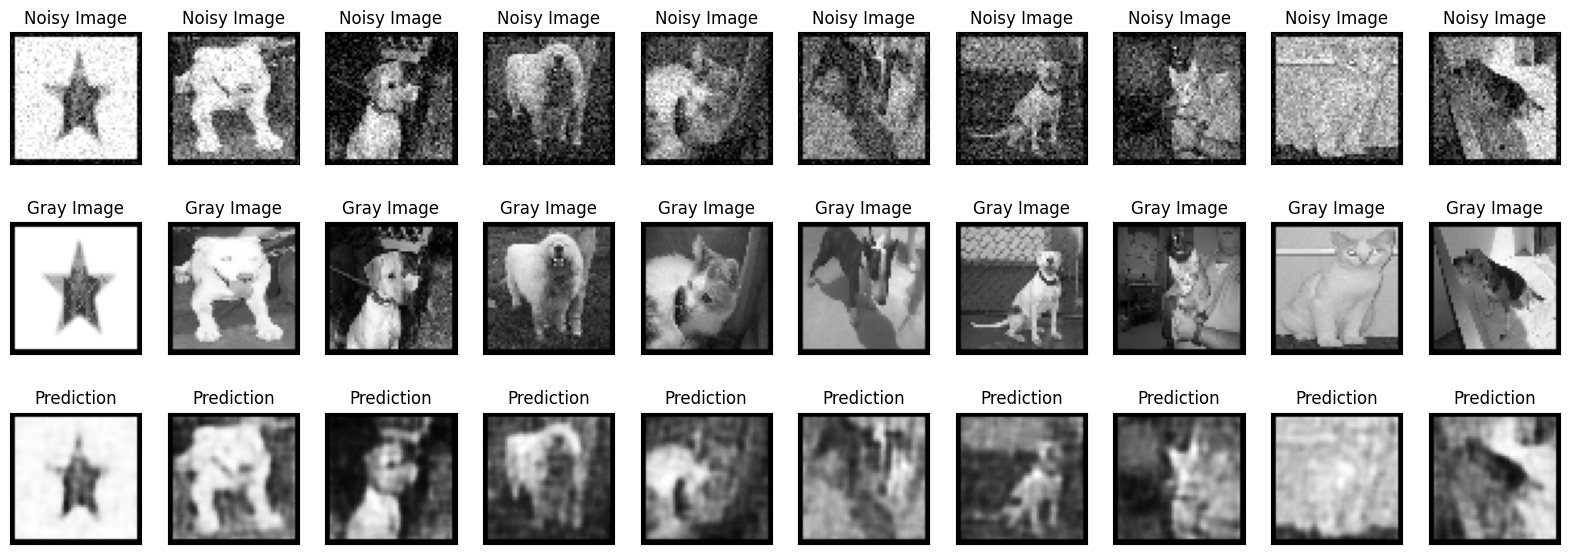

In [ ]:
n = 10
plt.figure(figsize=(20, 7))
for i in range(n):
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i], cmap='gray')
    plt.title("Noisy Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(X_test_gray[i], cmap='gray')
    plt.title("Gray Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i+1+n+n)
    plt.imshow(prediction[i], cmap='gray')
    plt.title("Prediction")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Visualization


In [ ]:
encoder_imgs = encoder.predict(X_test_gray)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
x = encoder_imgs[:, 0]
y = encoder_imgs[:, 20]
z = encoder_imgs[:, 40]

Analyze latent space

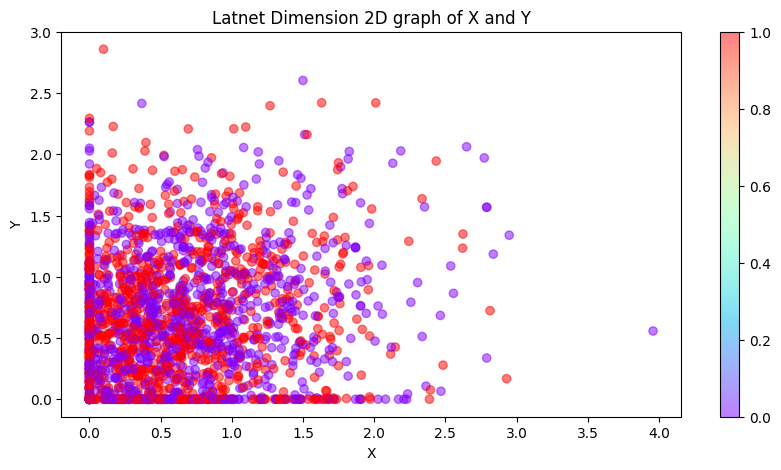

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.title("Latnet Dimension 2D graph of X and Y")
plt.scatter(x, y, cmap="rainbow", c=y_test, alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar()
plt.show()

Text(0.5, 0, '$Z$')

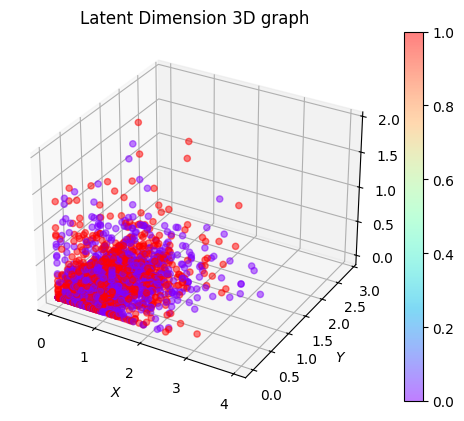

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
p = ax.scatter(x, y, z, alpha=0.5, c=y_test, cmap='rainbow')
plt.title("Latent Dimension 3D graph")
fig.colorbar(p)
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_zlabel("$Z$")

Analyze loss values

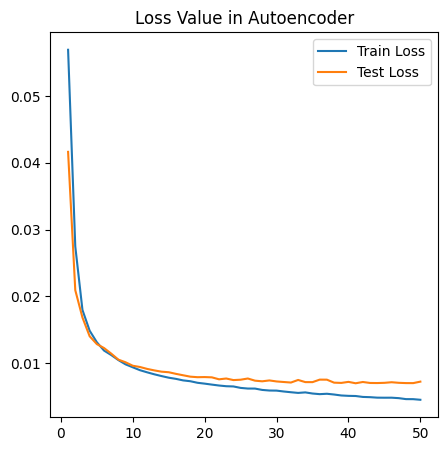

In [ ]:
loss_list = history.history['loss']
val_loss_list = history.history['val_loss']
fig = plt.figure(figsize=(5, 5))
plt.plot([i for i in range(1, 51)], loss_list, label='Train Loss')
plt.plot([i for i in range(1, 51)], val_loss_list, label='Test Loss')
plt.title("Loss Value in Autoencoder")
plt.legend()
plt.show()

### Member participation

ศิวกร รับผิดชอบ

- สร้าง autoencoder ทั้ง encoder และ decoder model

- สร้าง latent space 2 กราฟ ได้แก่ กราฟ 2 แกน และ กราฟ 3 แกน

- สร้าง loss values กราฟ แต่ละ epoch

มารีน่า รับผิดชอบ

- ทำ data prepossessing

- ช่วย ศิวกร ปรับจูนพารามิเตอร์ต่าง ๆ ของโมเดล

- ทำ markdown

แพรวรุ้ง รับผิดชอบ

- ประสานงาน

- ช่วย มารีน่า ทำ data prepossessing

### AI disclosure

ใช้เครื่องมือปัญญาประดิษฐ์ คือ แชท GPT

ศิวกร

- ใช้หาเป้าหมายของ autoencoder ว่าคืออะไร

- ตรวจสอบแล้ว

มารีน่า

- ใช้อธิบายศัพท์เฉพาะ และค่าพาริมิเตอร์ที่ยังไม่เข้าใจ เช่น MeanSquaredError/LATENT_DIM คือค่าอะไร

- ตรวจสอบแล้ว

แหล่งอ้างอิงที่ใช้ :

https://www.tensorflow.org/tutorials/generative/autoencoder

https://www.kaggle.com/code/theblackmamba31/**autoencoder**-grayscale-to-color-image/notebook